In [1]:
#Loading libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data......
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print("train data has {0} row and {1} column".format(train.shape[0],train.shape[1]))
print(".......................................")
print("test data has {0} row and {1} column".format(test.shape[0],test.shape[1]))

train data has 1460 row and 81 column
.......................................
test data has 1459 row and 80 column


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#checking missing values
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
#missing value counts % in each of these columns
miss = (train.isnull().sum()/len(train))*100
miss = miss[miss>0]
miss.sort_values(inplace=True)
miss

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

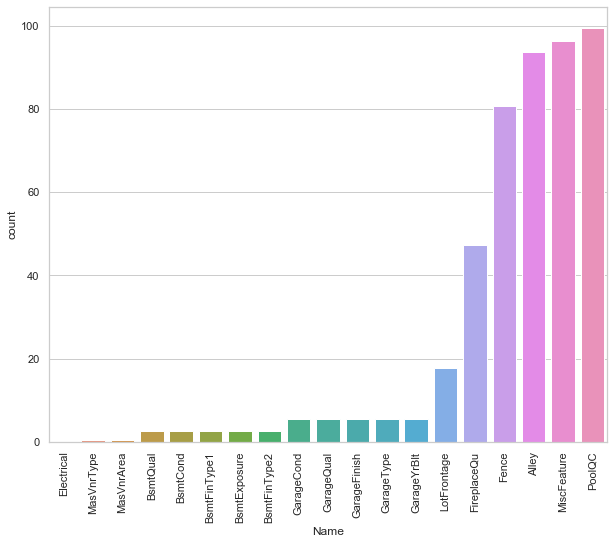

In [8]:
#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#ploting the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.show()

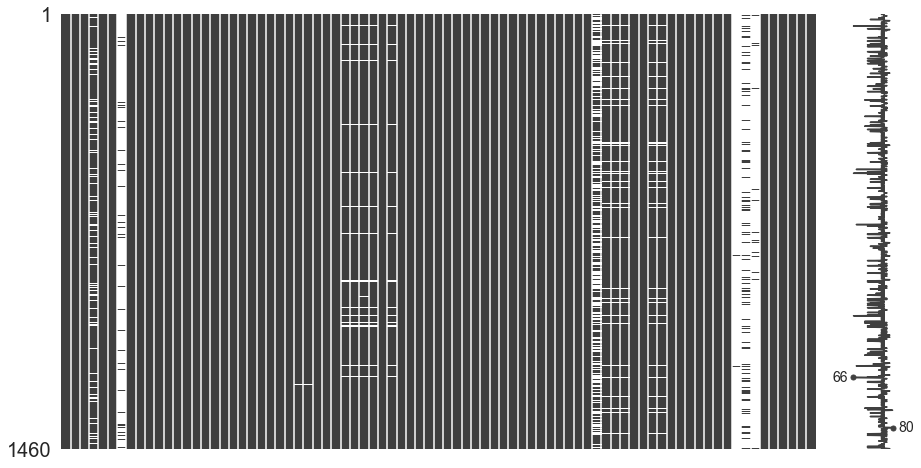

In [9]:
import missingno
missingno.matrix(train, figsize = (15,8))
plt.show()

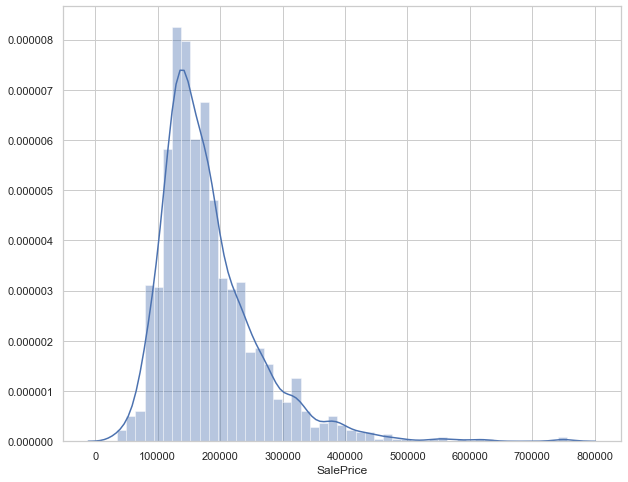

In [10]:
#SalePrice
sns.distplot(train['SalePrice'])
plt.show()

In [11]:
#skewness
print("The skewness of SalePrice is {}".format(train['SalePrice'].skew()))

The skewness of SalePrice is 1.8828757597682129


Skewness is 0.12133506220520406


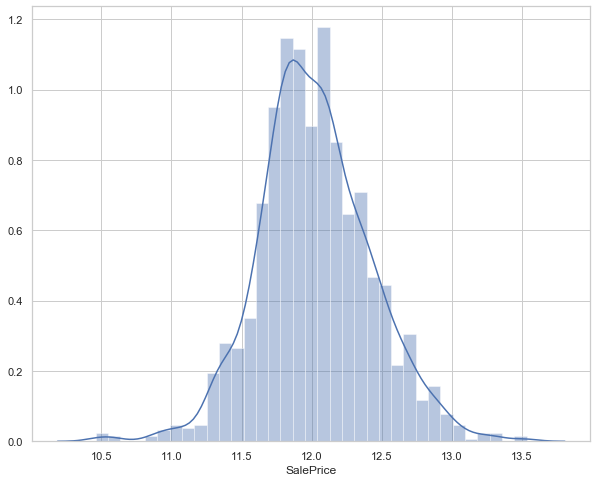

In [12]:
#transforming the target variable
target = np.log(train['SalePrice'])
print('Skewness is {}'.format(target.skew()))
sns.distplot(target)
plt.show()

In [13]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [14]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [15]:
#seperating variable in new data types
numeric_data = train.select_dtypes(include = [np.number])
cat_data = train.select_dtypes(exclude = [np.number])
print("There are {} numeric dtypes and {} category dtypes".format(numeric_data.shape[1],cat_data.shape[1]))

There are 38 numeric dtypes and 43 category dtypes


In [16]:
del numeric_data['Id']

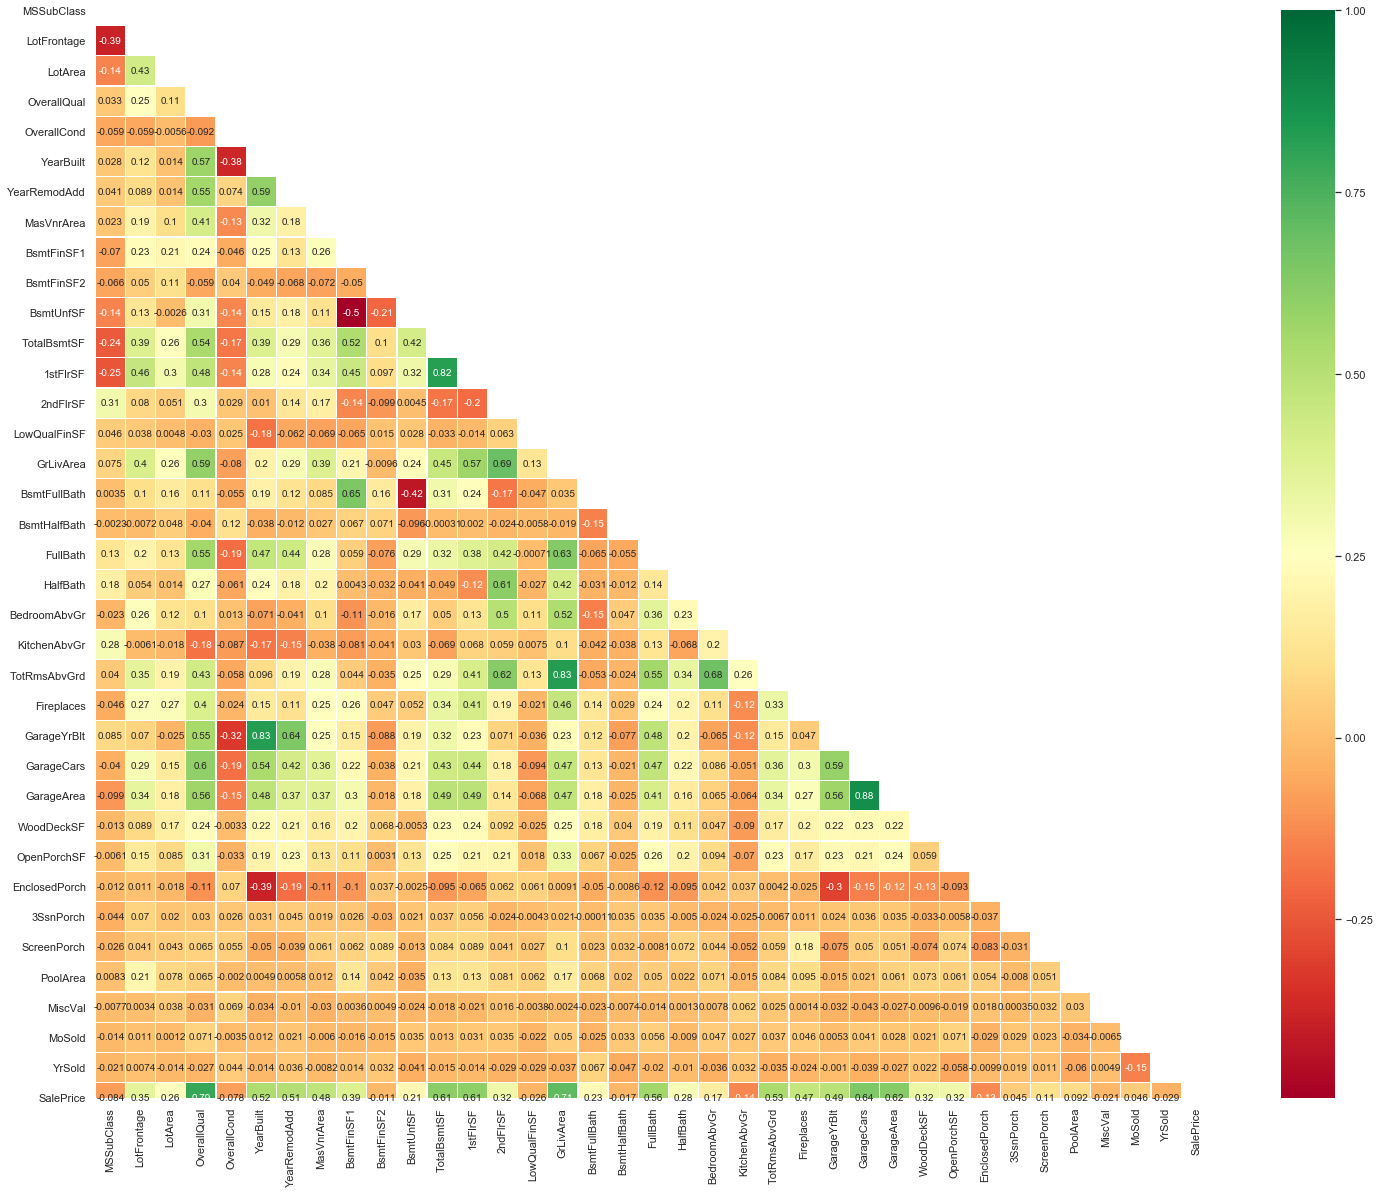

In [17]:
#correlation plot
corr = numeric_data.corr()
mask = np.zeros_like(corr,dtype = np.bool)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(25,20))
sns.heatmap(corr,mask=mask,annot = True, cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
plt.show()

In [18]:
print(corr['SalePrice'].sort_values(ascending=False)[:15])
print('.........................')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64
.........................
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [19]:
#having a look on OverallQual variable
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [20]:
#checking mean price per quality and plot it
pivot = train.pivot_table(index = 'OverallQual',values='SalePrice',aggfunc=np.median)
pivot.sort_values('OverallQual')

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


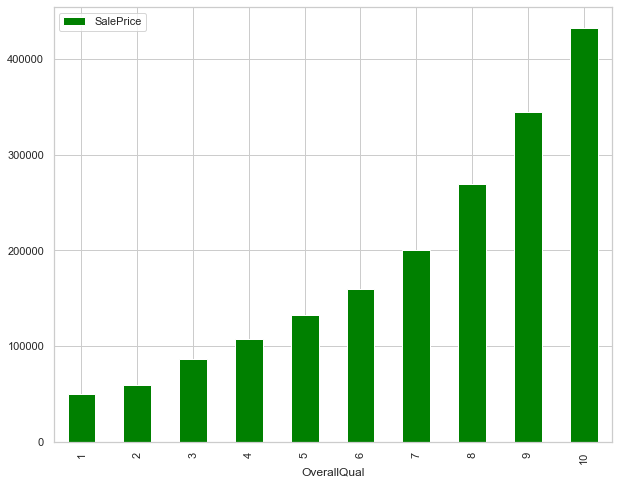

In [21]:
pivot.plot(kind ='bar',color='green')
plt.show()

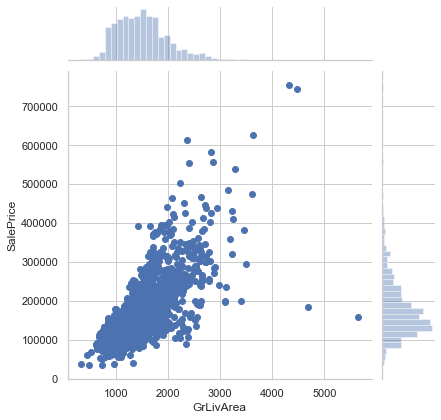

In [22]:
#having a look at Grilivarea variable
sns.jointplot(x=train['GrLivArea'],y=train['SalePrice'])
plt.show()

In [23]:
cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [24]:
sp_pivot = train.pivot_table(index='SaleCondition',values='SalePrice',aggfunc=np.median)
sp_pivot.sort_values('SalePrice')
sp_pivot

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,244600


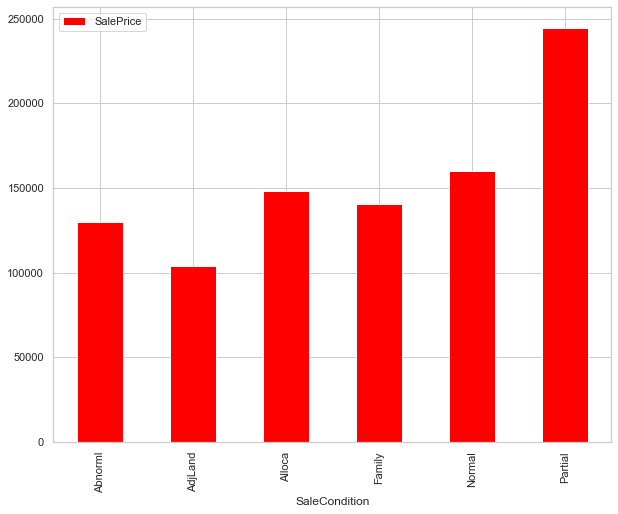

In [25]:
sp_pivot.plot(kind='bar',color='red')
plt.show()

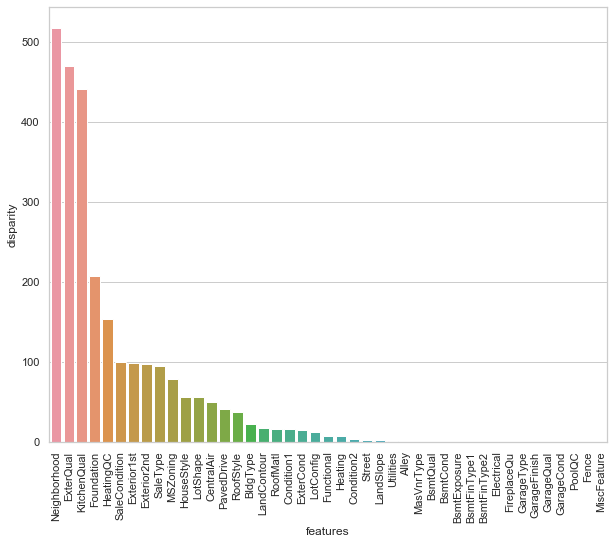

In [26]:
#ANOVA test to understand the correlation between categorical variables and SalePrice
cat = [f for f in train.columns if train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['SalePrice'] = train.SalePrice.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt.show()

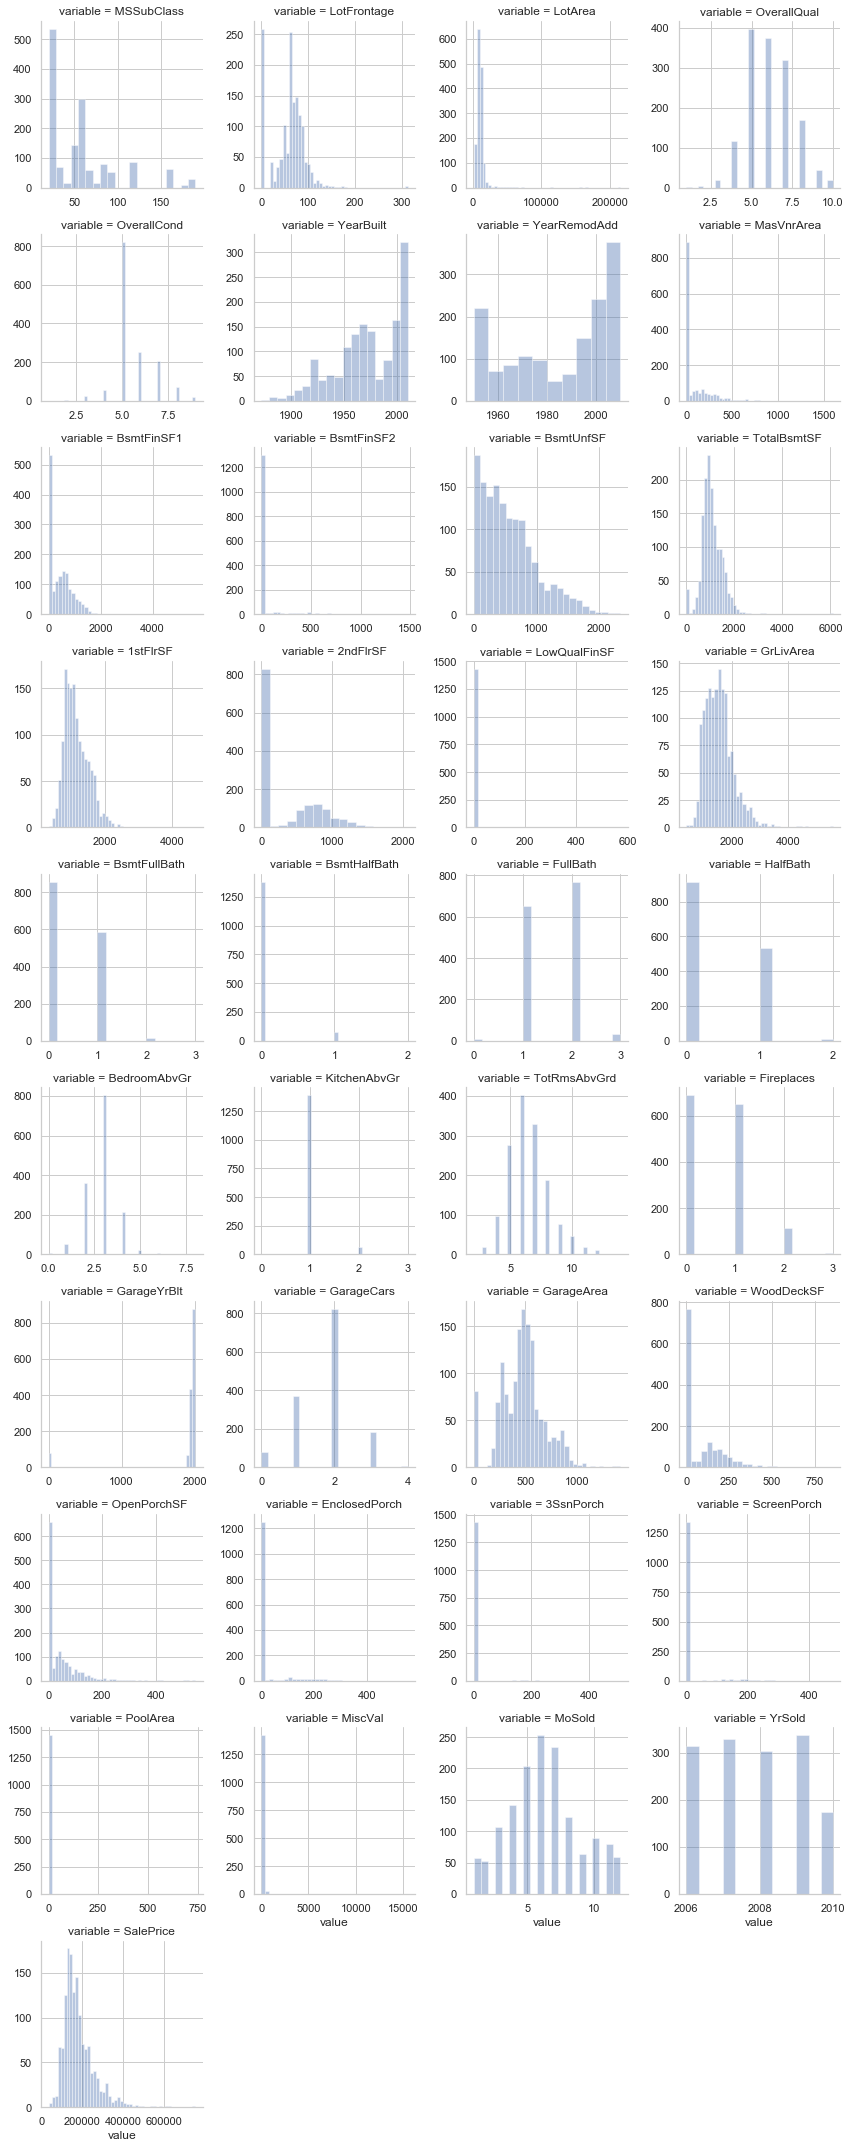

In [27]:
#creating numeric plots
num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(train, value_vars = num)
nd["value"].fillna(0,inplace=True)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value',kde=False)
n1
plt.show()

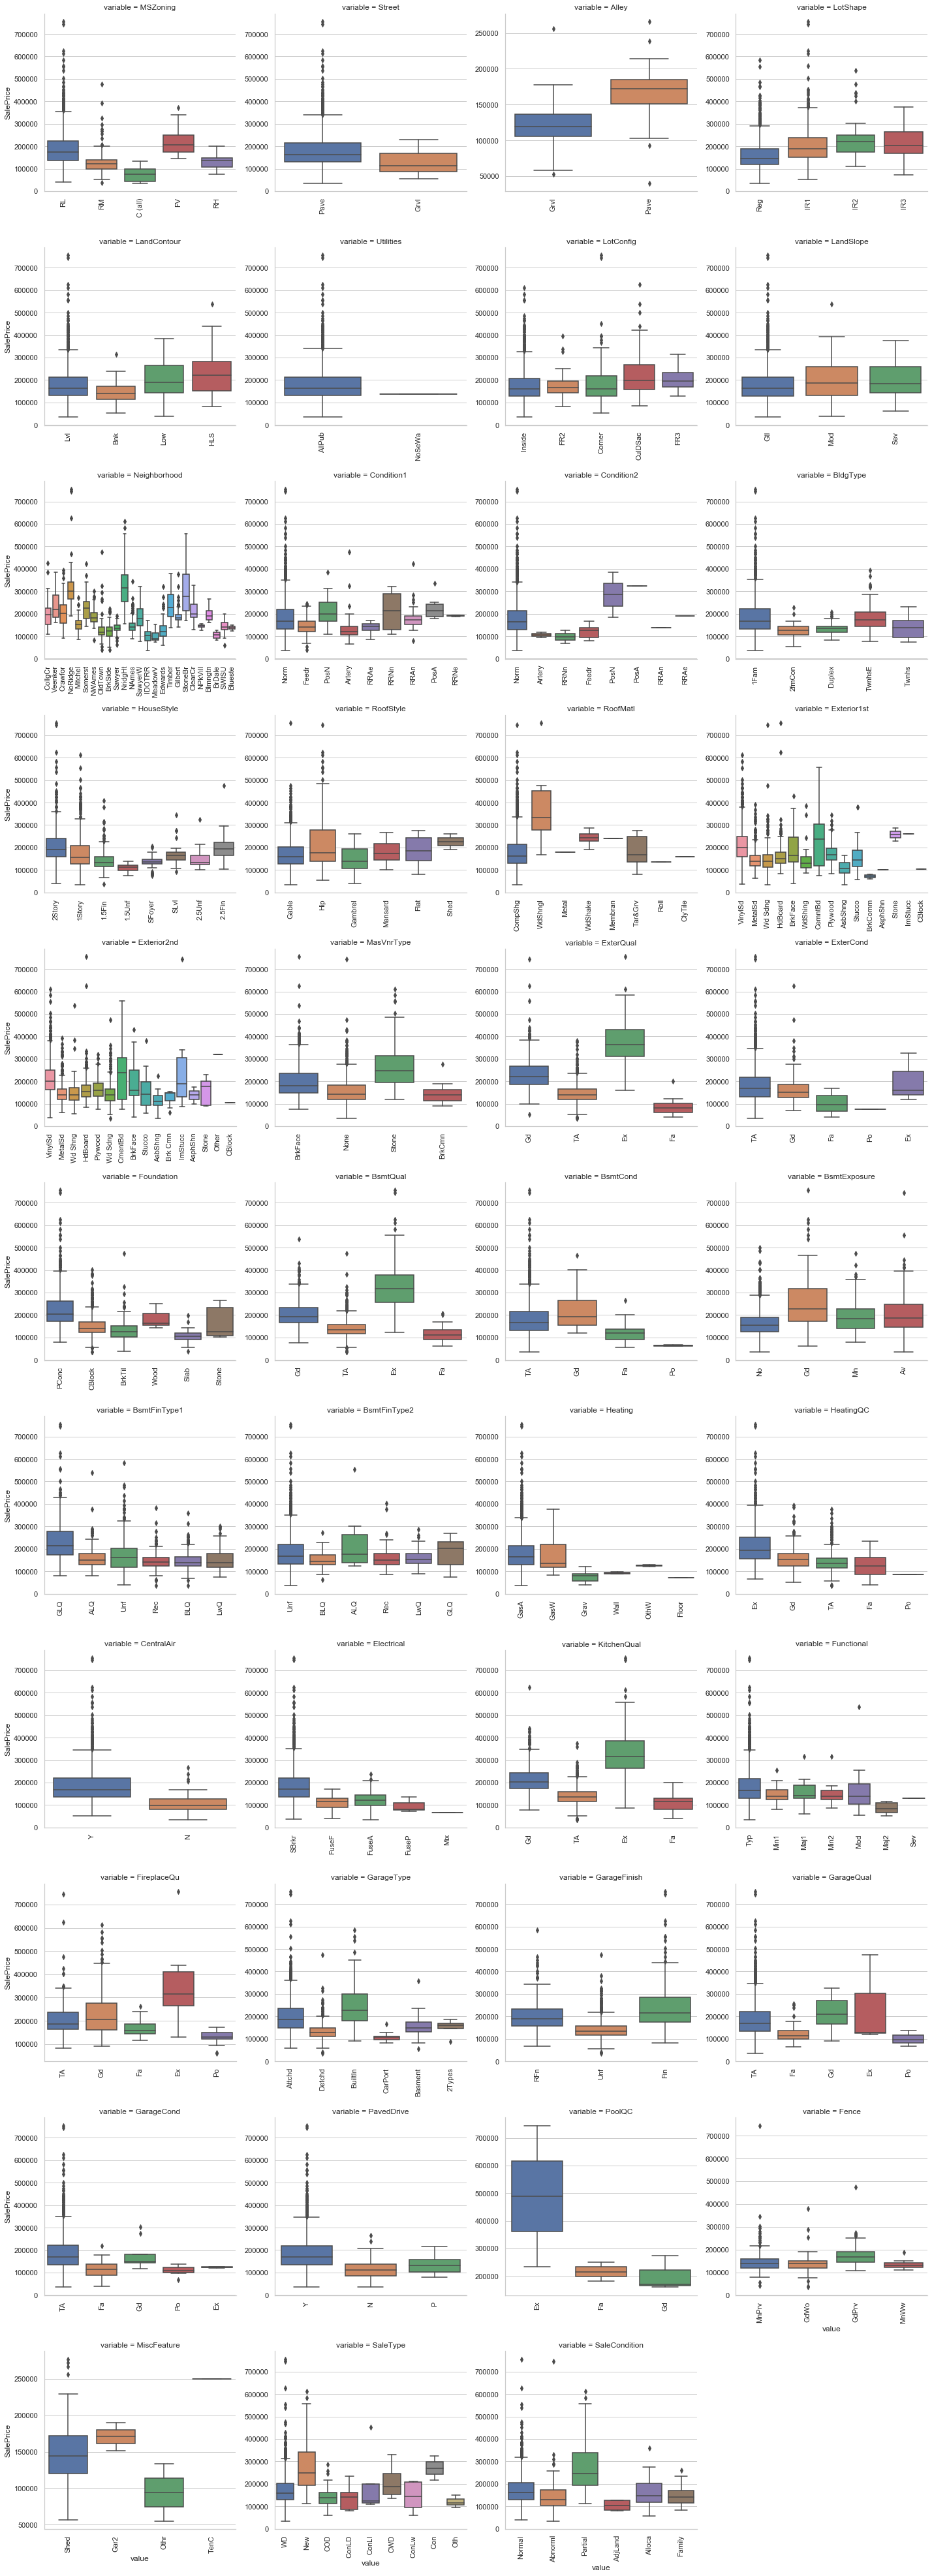

In [28]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']

p = pd.melt(train, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=4, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g
plt.show()

In [29]:
#removing outliers
train.drop(train[train['GrLivArea'] > 4000].index, inplace=True)
train.shape

(1456, 81)

In [30]:
test[['GarageQual','GarageCond','GarageFinish']].describe()

,GarageQual,GarageCond,GarageFinish
count,1381,1381,1381
unique,4,5,3
top,TA,TA,Unf
freq,1293,1328,625


In [31]:
test['GarageYrBlt'].median()

1979.0

In [32]:
#imputing using mode
test.loc[666, 'GarageQual'] = "TA" 
test.loc[666, 'GarageCond'] = "TA" 
test.loc[666, 'GarageFinish'] = "Unf" 
test.loc[666, 'GarageYrBlt'] = "1980"

In [33]:
#mark as missing
test.loc[1116, 'GarageType'] = np.nan

In [34]:
#importing function
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var, fill_na = None):
      if fill_na is not None:
            data[var].fillna(fill_na, inplace=True)
      le.fit(data[var])
      data[var] = le.transform(data[var])
      return data

In [35]:
#combining the data set
alldata = train.append(test)
alldata.shape

(2915, 81)

In [36]:
#imputing lotfrontage by median of neighborhood
lot_frontage_by_neighborhood = train['LotFrontage'].groupby(train['Neighborhood'])

for key, group in lot_frontage_by_neighborhood:
                idx = (alldata['Neighborhood'] == key) & (alldata['LotFrontage'].isnull())
                alldata.loc[idx, 'LotFrontage'] = group.median()

In [37]:
#imputing missing values
alldata["MasVnrArea"].fillna(0, inplace=True)
alldata["BsmtFinSF1"].fillna(0, inplace=True)
alldata["BsmtFinSF2"].fillna(0, inplace=True)
alldata["BsmtUnfSF"].fillna(0, inplace=True)
alldata["TotalBsmtSF"].fillna(0, inplace=True)
alldata["GarageArea"].fillna(0, inplace=True)
alldata["BsmtFullBath"].fillna(0, inplace=True)
alldata["BsmtHalfBath"].fillna(0, inplace=True)
alldata["GarageCars"].fillna(0, inplace=True)
alldata["GarageYrBlt"].fillna(0.0, inplace=True)
alldata["PoolArea"].fillna(0, inplace=True)

In [38]:
qual_dict = {np.nan: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
name = np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])

for i in name:
     alldata[i] = alldata[i].map(qual_dict).astype(int)

alldata["BsmtExposure"] = alldata["BsmtExposure"].map({np.nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

bsmt_fin_dict = {np.nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
alldata["BsmtFinType1"] = alldata["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
alldata["BsmtFinType2"] = alldata["BsmtFinType2"].map(bsmt_fin_dict).astype(int)
alldata["Functional"] = alldata["Functional"].map({np.nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

alldata["GarageFinish"] = alldata["GarageFinish"].map({np.nan: 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)
alldata["Fence"] = alldata["Fence"].map({np.nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

#encoding data
alldata["CentralAir"] = (alldata["CentralAir"] == "Y") * 1.0
varst = np.array(['MSSubClass','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Foundation','SaleCondition'])

for x in varst:
         factorize(alldata, x)

#encoding variables and impute missing values
alldata = factorize(alldata, "MSZoning", "RL")
alldata = factorize(alldata, "Exterior1st", "Other")
alldata = factorize(alldata, "Exterior2nd", "Other")
alldata = factorize(alldata, "MasVnrType", "None")
alldata = factorize(alldata, "SaleType", "Oth")  

In [39]:
#creating new variable (1 or 0) based on irregular count levels
#The level with highest count is kept as 1 and rest as 0
alldata["IsRegularLotShape"] = (alldata["LotShape"] == "Reg") * 1
alldata["IsLandLevel"] = (alldata["LandContour"] == "Lvl") * 1
alldata["IsLandSlopeGentle"] = (alldata["LandSlope"] == "Gtl") * 1
alldata["IsElectricalSBrkr"] = (alldata["Electrical"] == "SBrkr") * 1
alldata["IsGarageDetached"] = (alldata["GarageType"] == "Detchd") * 1
alldata["IsPavedDrive"] = (alldata["PavedDrive"] == "Y") * 1
alldata["HasShed"] = (alldata["MiscFeature"] == "Shed") * 1
alldata["Remodeled"] = (alldata["YearRemodAdd"] != alldata["YearBuilt"]) * 1

#Did the modeling happen during the sale year?
alldata["RecentRemodel"] = (alldata["YearRemodAdd"] == alldata["YrSold"]) * 1

# Was this house sold in the year it was built?
alldata["VeryNewHouse"] = (alldata["YearBuilt"] == alldata["YrSold"]) * 1
alldata["Has2ndFloor"] = (alldata["2ndFlrSF"] == 0) * 1
alldata["HasMasVnr"] = (alldata["MasVnrArea"] == 0) * 1
alldata["HasWoodDeck"] = (alldata["WoodDeckSF"] == 0) * 1
alldata["HasOpenPorch"] = (alldata["OpenPorchSF"] == 0) * 1
alldata["HasEnclosedPorch"] = (alldata["EnclosedPorch"] == 0) * 1
alldata["Has3SsnPorch"] = (alldata["3SsnPorch"] == 0) * 1
alldata["HasScreenPorch"] = (alldata["ScreenPorch"] == 0) * 1

#setting levels with high count as 1 and the rest as 0
alldata["HighSeason"] = alldata["MoSold"].replace({1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})
alldata["NewerDwelling"] = alldata["MSSubClass"].replace({20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})

In [40]:
alldata.shape

(2915, 100)

In [41]:
#creating alldata2 for reference to create new features
alldata2 = train.append(test)

alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

#cheking house completed before sale or not
alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})

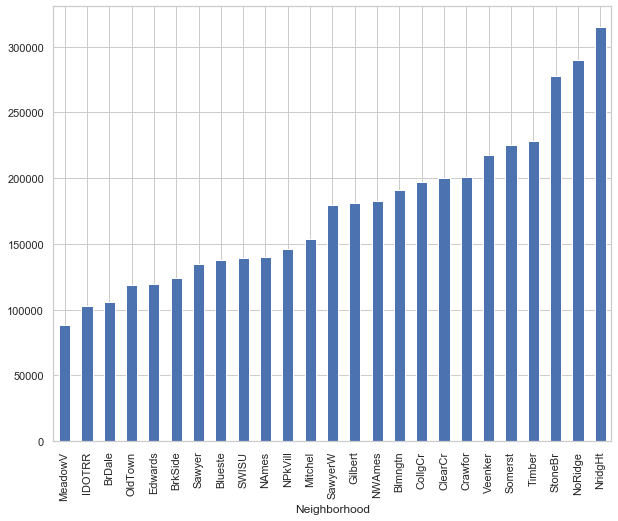

In [42]:
#calculating total area using all area columns
area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]

alldata["TotalArea"] = alldata[area_cols].sum(axis=1)
alldata["TotalArea1st2nd"] = alldata["1stFlrSF"] + alldata["2ndFlrSF"]
alldata["Age"] = 2010 - alldata["YearBuilt"]
alldata["TimeSinceSold"] = 2010 - alldata["YrSold"]
alldata["SeasonSold"] = alldata["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)
alldata["YearsSinceRemodel"] = alldata["YrSold"] - alldata["YearRemodAdd"]

#Simplifications of existing features into bad/average/good based on counts
alldata["SimplOverallQual"] = alldata.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplOverallCond"] = alldata.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplPoolQC"] = alldata.PoolQC.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2})
alldata["SimplGarageCond"] = alldata.GarageCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplGarageQual"] = alldata.GarageQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFunctional"] = alldata.Functional.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
alldata["SimplKitchenQual"] = alldata.KitchenQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplHeatingQC"] = alldata.HeatingQC.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtFinType1"] = alldata.BsmtFinType1.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtFinType2"] = alldata.BsmtFinType2.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtCond"] = alldata.BsmtCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtQual"] = alldata.BsmtQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterCond"] = alldata.ExterCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterQual"] = alldata.ExterQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})

#grouping neighborhood variable based on this plot
train['SalePrice'].groupby(train['Neighborhood']).median().sort_values().plot(kind='bar')
plt.show()

In [43]:
neighborhood_map = {"MeadowV" : 0, "IDOTRR" : 1, "BrDale" : 1, "OldTown" : 1, "Edwards" : 1, "BrkSide" : 1,"Sawyer" : 1, "Blueste" : 1, "SWISU" : 2, "NAmes" : 2, "NPkVill" : 2, "Mitchel" : 2, "SawyerW" : 2, "Gilbert" : 2, "NWAmes" : 2, "Blmngtn" : 2, "CollgCr" : 2, "ClearCr" : 3, "Crawfor" : 3, "Veenker" : 3, "Somerst" : 3, "Timber" : 3, "StoneBr" : 4, "NoRidge" : 4, "NridgHt" : 4}

alldata['NeighborhoodBin'] = alldata2['Neighborhood'].map(neighborhood_map)
alldata.loc[alldata2.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
alldata["Neighborhood_Good"].fillna(0, inplace=True)
alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})


alldata.shape

(2915, 126)

In [44]:
#creating new data
train_new = alldata[alldata['SalePrice'].notnull()]
test_new = alldata[alldata['SalePrice'].isnull()]

In [45]:
print("Train", train_new.shape)
print('----------------')
print("Test", test_new.shape)

Train (1456, 126)
----------------
Test (1459, 126)


In [46]:
#getting numeric features
numeric_features = [f for f in train_new.columns if train_new[f].dtype != object]

#transforming the numeric features using log(x + 1)
from scipy.stats import skew
skewed = train_new[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
train_new[skewed] = np.log1p(train_new[skewed])
test_new[skewed] = np.log1p(test_new[skewed])
del test_new['SalePrice']

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_new[numeric_features])
scaled = scaler.transform(train_new[numeric_features])

for i, col in enumerate(numeric_features):
       train_new[col] = scaled[:,i]

numeric_features.remove('SalePrice')
scaled = scaler.fit_transform(test_new[numeric_features])

for i, col in enumerate(numeric_features):
      test_new[col] = scaled[:,i]

In [48]:
def onehot(onehot_df, df, column_name, fill_na):
       onehot_df[column_name] = df[column_name]
       if fill_na is not None:
            onehot_df[column_name].fillna(fill_na, inplace=True)

       dummies = pd.get_dummies(onehot_df[column_name], prefix="_"+column_name)
       onehot_df = onehot_df.join(dummies)
       onehot_df = onehot_df.drop([column_name], axis=1)
       return onehot_df

def munge_onehot(df):
       onehot_df = pd.DataFrame(index = df.index)

       onehot_df = onehot(onehot_df, df, "MSSubClass", None)
       onehot_df = onehot(onehot_df, df, "MSZoning", "RL")
       onehot_df = onehot(onehot_df, df, "LotConfig", None)
       onehot_df = onehot(onehot_df, df, "Neighborhood", None)
       onehot_df = onehot(onehot_df, df, "Condition1", None)
       onehot_df = onehot(onehot_df, df, "BldgType", None)
       onehot_df = onehot(onehot_df, df, "HouseStyle", None)
       onehot_df = onehot(onehot_df, df, "RoofStyle", None)
       onehot_df = onehot(onehot_df, df, "Exterior1st", "VinylSd")
       onehot_df = onehot(onehot_df, df, "Exterior2nd", "VinylSd")
       onehot_df = onehot(onehot_df, df, "Foundation", None)
       onehot_df = onehot(onehot_df, df, "SaleType", "WD")
       onehot_df = onehot(onehot_df, df, "SaleCondition", "Normal")

       #Filling in missing MasVnrType for rows that do have a MasVnrArea.
       temp_df = df[["MasVnrType", "MasVnrArea"]].copy()
       idx = (df["MasVnrArea"] != 0) & ((df["MasVnrType"] == "None") | (df["MasVnrType"].isnull()))
       temp_df.loc[idx, "MasVnrType"] = "BrkFace"
       onehot_df = onehot(onehot_df, temp_df, "MasVnrType", "None")

       onehot_df = onehot(onehot_df, df, "LotShape", None)
       onehot_df = onehot(onehot_df, df, "LandContour", None)
       onehot_df = onehot(onehot_df, df, "LandSlope", None)
       onehot_df = onehot(onehot_df, df, "Electrical", "SBrkr")
       onehot_df = onehot(onehot_df, df, "GarageType", "None")
       onehot_df = onehot(onehot_df, df, "PavedDrive", None)
       onehot_df = onehot(onehot_df, df, "MiscFeature", "None")
       onehot_df = onehot(onehot_df, df, "Street", None)
       onehot_df = onehot(onehot_df, df, "Alley", "None")
       onehot_df = onehot(onehot_df, df, "Condition2", None)
       onehot_df = onehot(onehot_df, df, "RoofMatl", None)
       onehot_df = onehot(onehot_df, df, "Heating", None)

       
       onehot_df = onehot(onehot_df, df, "ExterQual", "None")
       onehot_df = onehot(onehot_df, df, "ExterCond", "None")
       onehot_df = onehot(onehot_df, df, "BsmtQual", "None")
       onehot_df = onehot(onehot_df, df, "BsmtCond", "None")
       onehot_df = onehot(onehot_df, df, "HeatingQC", "None")
       onehot_df = onehot(onehot_df, df, "KitchenQual", "TA")
       onehot_df = onehot(onehot_df, df, "FireplaceQu", "None")
       onehot_df = onehot(onehot_df, df, "GarageQual", "None")
       onehot_df = onehot(onehot_df, df, "GarageCond", "None")
       onehot_df = onehot(onehot_df, df, "PoolQC", "None")
       onehot_df = onehot(onehot_df, df, "BsmtExposure", "None")
       onehot_df = onehot(onehot_df, df, "BsmtFinType1", "None")
       onehot_df = onehot(onehot_df, df, "BsmtFinType2", "None")
       onehot_df = onehot(onehot_df, df, "Functional", "Typ")
       onehot_df = onehot(onehot_df, df, "GarageFinish", "None")
       onehot_df = onehot(onehot_df, df, "Fence", "None")
       onehot_df = onehot(onehot_df, df, "MoSold", None)

       # Dividing  the years between 1871 and 2010 into slices of 20 years
       year_map = pd.concat(pd.Series("YearBin" + str(i+1), index=range(1871+i*20,1891+i*20))  for i in range(0, 7))
       yearbin_df = pd.DataFrame(index = df.index)
       yearbin_df["GarageYrBltBin"] = df.GarageYrBlt.map(year_map)
       yearbin_df["GarageYrBltBin"].fillna("NoGarage", inplace=True)
       yearbin_df["YearBuiltBin"] = df.YearBuilt.map(year_map)
       yearbin_df["YearRemodAddBin"] = df.YearRemodAdd.map(year_map)

       onehot_df = onehot(onehot_df, yearbin_df, "GarageYrBltBin", None)
       onehot_df = onehot(onehot_df, yearbin_df, "YearBuiltBin", None)
       onehot_df = onehot(onehot_df, yearbin_df, "YearRemodAddBin", None)
       return onehot_df

#creating one-hot features
onehot_df = munge_onehot(train)

neighborhood_train = pd.DataFrame(index=train_new.shape)
neighborhood_train['NeighborhoodBin'] = train_new['NeighborhoodBin']
neighborhood_test = pd.DataFrame(index=test_new.shape)
neighborhood_test['NeighborhoodBin'] = test_new['NeighborhoodBin']

onehot_df = onehot(onehot_df, neighborhood_train, 'NeighborhoodBin', None)

In [49]:
train_new = train_new.join(onehot_df) 
train_new.shape

(1456, 433)

In [50]:
#adding one hot features to test
onehot_df_te = munge_onehot(test)
onehot_df_te = onehot(onehot_df_te, neighborhood_test, "NeighborhoodBin", None)
test_new = test_new.join(onehot_df_te)
test_new.shape
(1459, 417)

(1459, 417)

In [51]:
#dropping some columns from the train data as they are not found in test
drop_cols = ["_Exterior1st_ImStucc", "_Exterior1st_Stone","_Exterior2nd_Other","_HouseStyle_2.5Fin","_RoofMatl_Membran", "_RoofMatl_Metal", "_RoofMatl_Roll", "_Condition2_RRAe", "_Condition2_RRAn", "_Condition2_RRNn", "_Heating_Floor", "_Heating_OthW", "_Electrical_Mix", "_MiscFeature_TenC", "_GarageQual_Ex",  "_PoolQC_Fa"]
train_new.drop(drop_cols, axis=1, inplace=True)
train_new.shape
(1456, 417)

(1456, 417)

In [52]:
#removing one column missing from test data
test_new.drop(["_MSSubClass_150"], axis=1, inplace=True)

# Droping these columns
drop_cols = ["_Condition2_PosN", # only two are not zero
         "_MSZoning_C (all)",
         "_MSSubClass_160"]

train_new.drop(drop_cols, axis=1, inplace=True)
test_new.drop(drop_cols, axis=1, inplace=True)

In [53]:
#creating a label set
label_df = pd.DataFrame(index = train_new.index, columns = ['SalePrice'])
label_df['SalePrice'] = np.log(train['SalePrice'])
print("Training set size:", train_new.shape)
print("Test set size:", test_new.shape)

Training set size: (1456, 414)
Test set size: (1459, 413)


In [54]:
cat_col=[f for f in train_new if train_new[f].dtypes=='object']
cat_col

['Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'PavedDrive',
 'MiscFeature']

In [55]:
train_new=factorize(train_new,"Street")
train_new=factorize(train_new,"LotShape")
train_new=factorize(train_new,"LandContour")
train_new=factorize(train_new,"LandSlope")
train_new=factorize(train_new,"Condition2")
train_new=factorize(train_new,"RoofMatl")
train_new=factorize(train_new,"Heating")
train_new=factorize(train_new,"PavedDrive")

In [56]:
test_new=factorize(test_new,"Street")
test_new=factorize(test_new,"LotShape")
test_new=factorize(test_new,"LandContour")
test_new=factorize(test_new,"LandSlope")
test_new=factorize(test_new,"Condition2")
test_new=factorize(test_new,"RoofMatl")
test_new=factorize(test_new,"Heating")
test_new=factorize(test_new,"PavedDrive")

In [65]:
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)

regr.fit(train_new, label_df)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1.5, missing=None, n_estimators=7200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1, seed=42,
             silent=1, subsample=0.2, verbosity=1)

In [66]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

# run prediction on training set to get an idea of how well it does
y_pred = regr.predict(train_new)
y_test = label_df
print("XGBoost score on training set: ", rmse(y_test, y_pred))


XGBoost score on training set:  0.031310746972778046


In [67]:
# make prediction on test set
y_pred_xgb = regr.predict(test_new)

#submit this prediction and get the score
pred1 = pd.DataFrame({'Id': test['Id'], 'SalePrice': np.exp(y_pred_xgb)})
pred1.to_csv('xgbnono.csv', header=True, index=False)

In [68]:
from sklearn.linear_model import Lasso

#found this best alpha through cross-validation
best_alpha = 0.00099

regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(train_new, label_df)

# run prediction on the training set to get a rough idea of how well it does
y_pred = regr.predict(train_new)
y_test = label_df
print("Lasso score on training set: ", rmse(y_test, y_pred))

Lasso score on training set:  0.0009900004518027627


In [69]:
#make prediction on the test set
y_pred_lasso = regr.predict(test_new)
lasso_ex = np.exp(y_pred_lasso)
pred1 = pd.DataFrame({'Id': test['Id'], 'SalePrice': lasso_ex})
pred1.to_csv('lasso_model.csv', header=True, index=False)

In [70]:
#simple average
y_pred = (y_pred_xgb + y_pred_lasso) / 2
y_pred = np.exp(y_pred)
pred_df = pd.DataFrame(y_pred, index=test["Id"], columns=["SalePrice"])
pred_df.to_csv('ensemble1.csv', header=True, index_label='Id')